In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [16]:
df = pd.read_csv('bol-sales.csv')
df.head(5)

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol
0,person_1,female,7065,4.6,30,105,117,1232
1,person_2,female,23028,9.8,23,81,70,1396
2,person_3,female,103377,9.2,11,38,94,1240
3,person_4,female,9815,3.2,16,54,124,720
4,person_5,female,22646,10.1,21,78,119,1379


In [120]:
sdf = df[['spent_bol', 'income', 'website_visits', ]]
sdf.head(3)

,spent_bol,income,website_visits
0,1232,7065,30
1,1396,23028,23
2,1240,103377,11


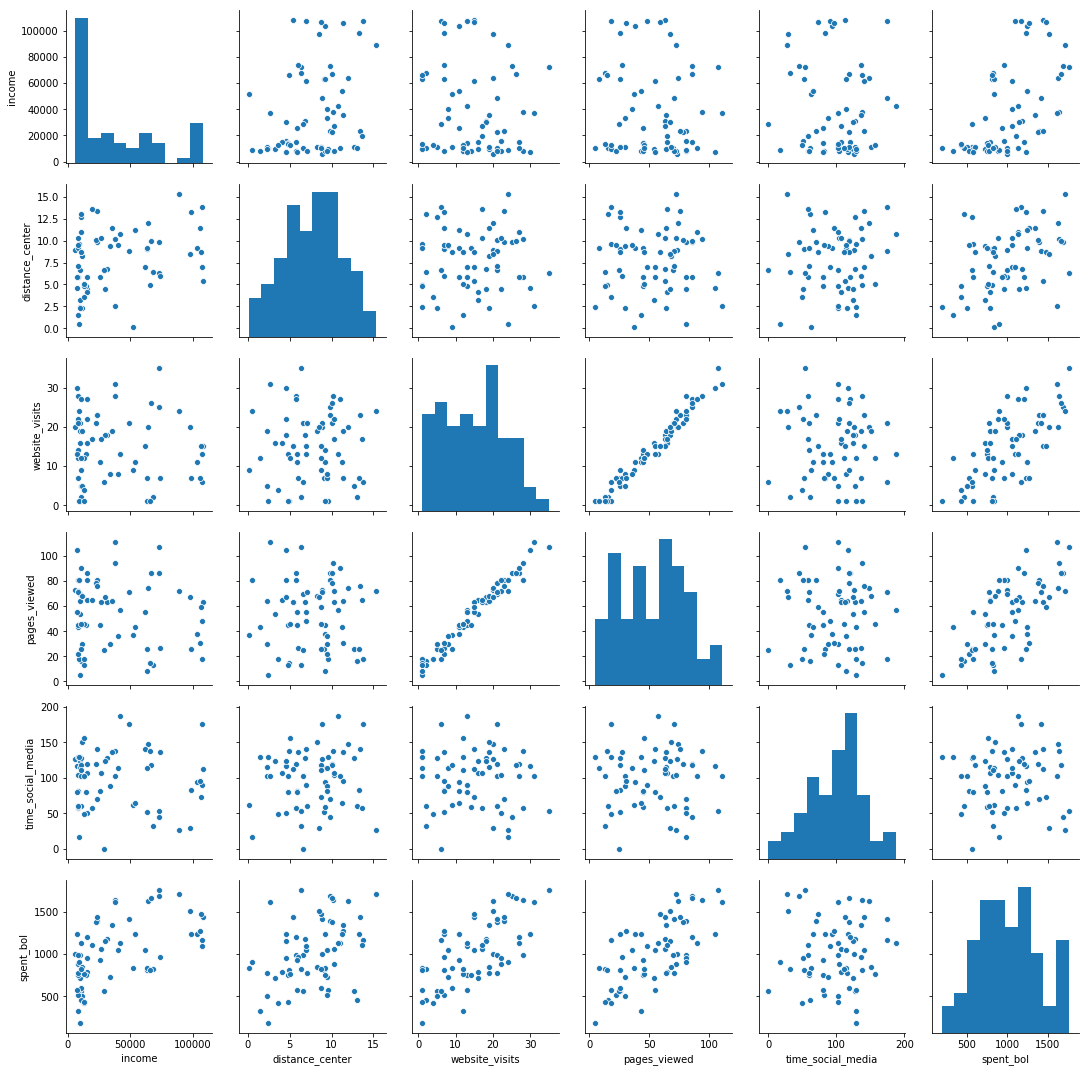

In [111]:
sns.pairplot(df)

Income X Spent_bol looks like a curve; using log to explore this relationship
Y=b0 + b1’’log(x)

spent_bol is the dependant variable; my independent variable are income_log & website_visits

In [121]:
#using log
sdf['income_log'] = sdf['income'].apply(math.log10)
sdf.head(5)

C:\Users\Yvonne\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,spent_bol,income,website_visits,income_log
0,1232,7065,30,3.849112
1,1396,23028,23,4.362256
2,1240,103377,11,5.014424
3,720,9815,16,3.991890
4,1379,22646,21,4.354992


In [147]:
#Linear model
y = sdf['spent_bol']
x = sdf.loc[:,'website_visits':'income_log']

lm = LinearRegression()
lm.fit(x, y)

b0 = lm.coef_[0]
b1 = lm.intercept_

In [124]:
sdf['prediction'] = lm.predict(x)
sdf.head(10)

C:\Users\Yvonne\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,spent_bol,income,website_visits,income_log,prediction
0,1232,7065,30,3.849112,1144.631585
1,1396,23028,23,4.362256,1242.873133
2,1240,103377,11,5.014424,1269.594245
3,720,9815,16,3.991890,790.860396
4,1379,22646,21,4.354992,1175.106617
5,1000,6142,20,3.788310,790.553511
6,1625,63833,20,4.805045,1423.781263
7,991,10139,21,4.005995,957.749983
8,990,8452,28,3.926959,1129.873259
9,954,15367,22,4.186589,1101.845787


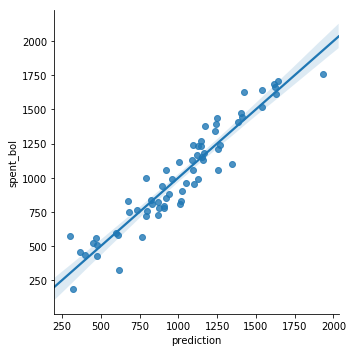

In [130]:
sns.lmplot(x="prediction", y="spent_bol", data=sdf)

In [141]:
math.sqrt(mean_squared_error(sdf['spent_bol'], sdf['prediction']))

119.45873789364862

### Step 2 - read csv of holdhout

In [137]:
hdf = pd.read_csv('bol_sales_holdout.csv')
hdf['income_log'] = hdf['income'].apply(math.log10)

hdf.head(5)

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,income_log
0,person_67,male,10813,4.8,10,41,107,4.033946
1,person_68,male,56724,13.2,12,52,0,4.753767
2,person_69,male,11476,9.0,2,16,120,4.059791
3,person_70,male,37781,11.4,15,56,134,4.577273
4,person_71,male,26179,9.4,14,50,92,4.417953


In [170]:
x = hdf[['website_visits','income_log']]

In [171]:
hdf_pred = lm.predict(x)

### comparing

In [174]:
df_answers = pd.read_csv('bol_sales_holdout_answers.csv')
df_answers.head(3)

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol
0,person_67,male,10813,4.8,10,41,107,470
1,person_68,male,56724,13.2,12,52,0,1219
2,person_69,male,11476,9.0,2,16,120,360


In [173]:
math.sqrt(mean_squared_error(df_answers['spent_bol'], hdf_pred))

175.36982854800837